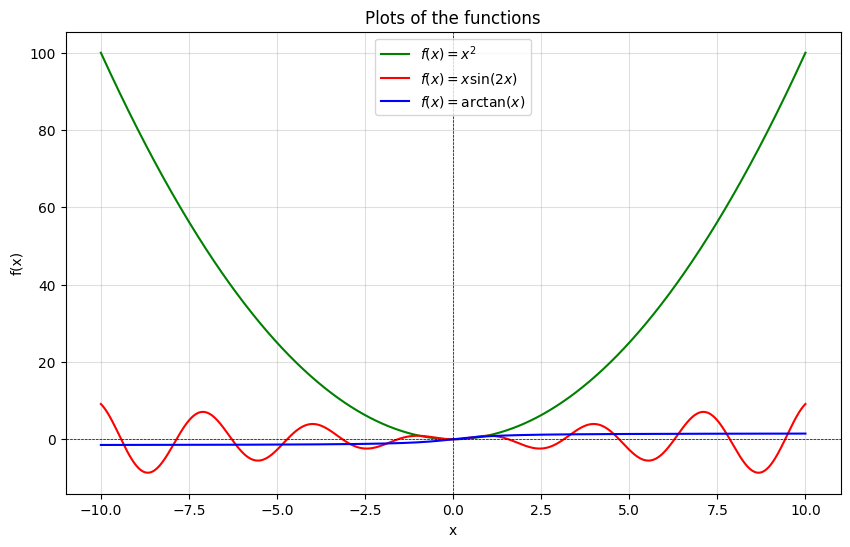

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(-10, 10, 1000)

# Define the functions
f1 = x**2
f2 = x * np.sin(2 * x)
f3 = np.arctan(x)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="green")
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="red")
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="blue")

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


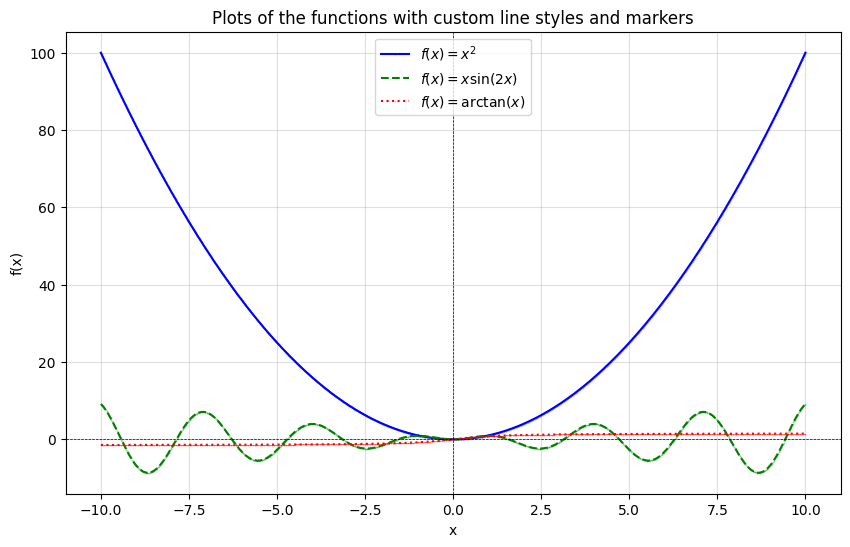

In [5]:
# Plot the functions with updated styles and markers
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="blue", linestyle="-", marker="o", markersize=0.1)
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="green", linestyle="--", marker="s", markersize=0.1)
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="red", linestyle=":", marker="^", markersize=0.1)

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions with custom line styles and markers")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


In [7]:
import pandas as pd

points_file = "points.csv"
distances_file = "distances.csv"
points = pd.read_csv(points_file).to_numpy()
distances = pd.read_csv(distances_file).to_numpy()

points.shape, distances.shape

((99, 2), (99, 1))

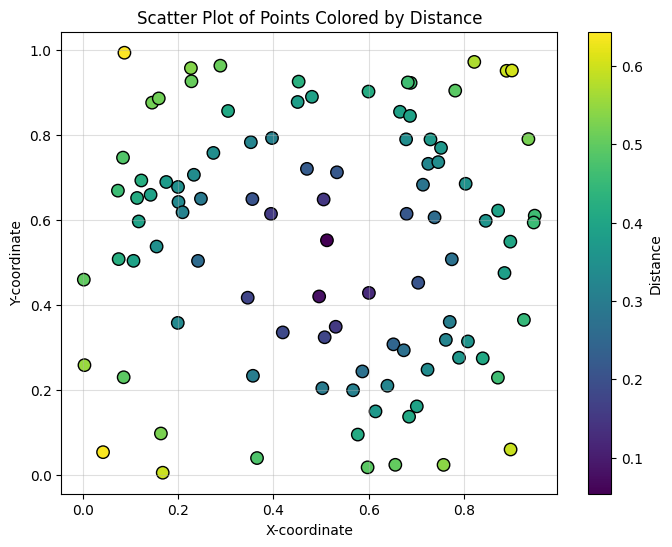

In [8]:
x = points[:, 0]
y = points[:, 1]

distances = distances.flatten()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=distances, cmap="viridis", edgecolor="k", s=80)
plt.colorbar(scatter, label="Distance")

plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Scatter Plot of Points Colored by Distance")
plt.grid(alpha=0.4)
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23284\431214259.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Plot of $f(x) = x \sin(x)$")


Text(0.5, 1.0, 'Plot of $f(x) = x \\sin(x)$')

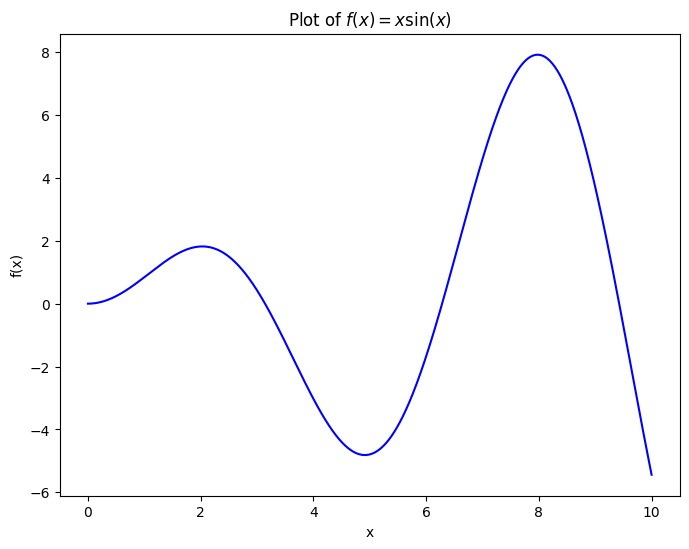

In [13]:
x = np.linspace(0, 10, 1000)
y = x * np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $f(x) = x \sin(x)$")

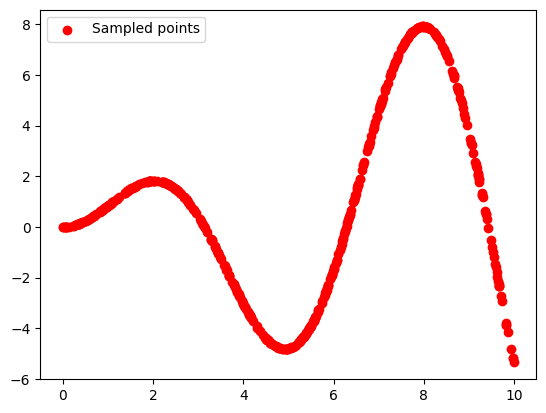

In [ ]:
n = 500
x_sample = np.random.choice(x, n)
y_sample = x_sample * np.sin(x_sample)

plt.scatter(x_sample, y_sample, color="red", label="Sampled points")
plt.legend()

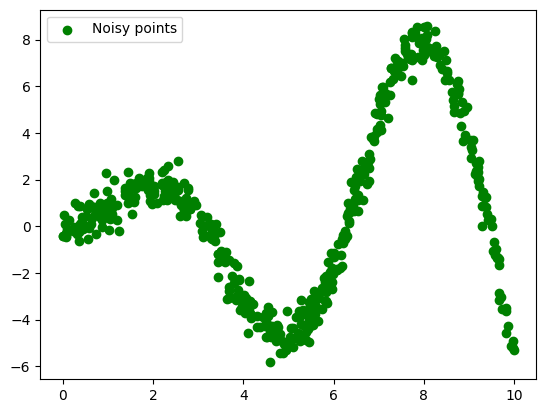

In [16]:
y_sample_noisy = y_sample + np.random.normal(0, 0.5, n)
plt.scatter(x_sample, y_sample_noisy, color="green", label="Noisy points")
plt.legend()

Mean Squared Error: 0.2904815592783987
R² Score: 0.9779185060165572
Cross-validated MSE: [0.30670914 0.34843709 0.35775304 0.30608608 0.32864776]


<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23284\3358569156.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Plot of $f(x) = x \sin(x)$")


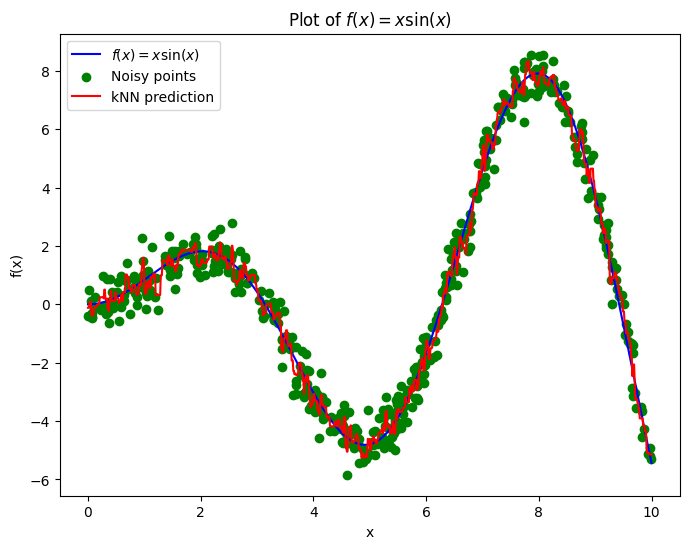

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample_noisy, test_size=0.2)

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train.reshape(-1, 1), y_train)

y_pred = knn.predict(x_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

scores = cross_val_score(knn, x_sample.reshape(-1, 1), y_sample_noisy, cv=5, scoring="neg_mean_squared_error")
print(f"Cross-validated MSE: {-scores}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $f(x) = x \sin(x)$")

plt.scatter(x_sample, y_sample_noisy, color="green", label="Noisy points")
plt.legend()

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_sample.reshape(-1, 1), y_sample_noisy)
y_pred = knn.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, label="kNN prediction", color="red")
plt.legend()

plt.show()

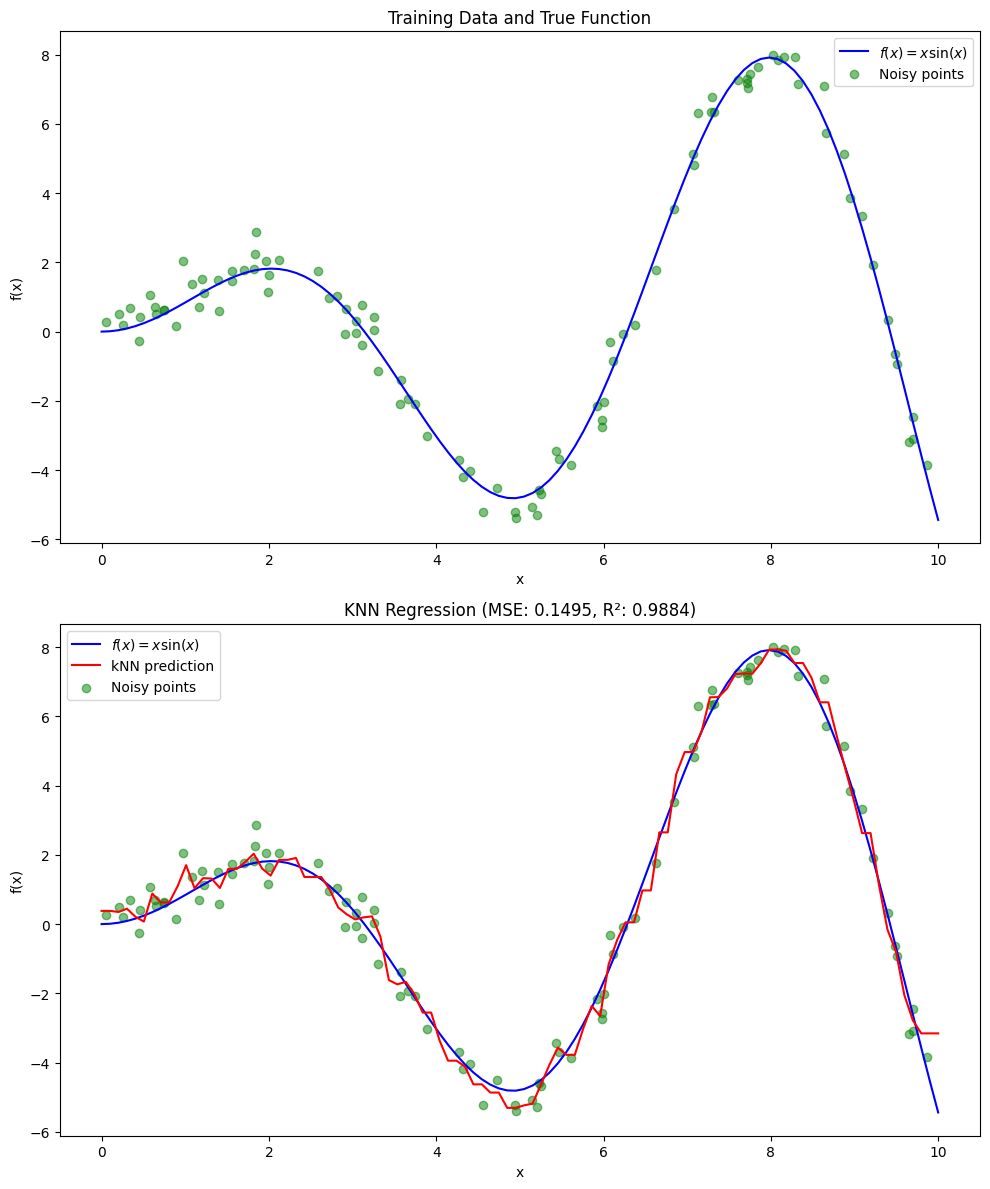

Best k_neighbors: 2
Mean Squared Error: 0.1495
R² Score: 0.9884


In [36]:
# with chat gpt help wow  soo nice 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from typing import Tuple, Optional
import logging

def generate_sample_data(n_samples: int = 100) -> Tuple[np.ndarray, np.ndarray]:
    """Generate sample data if not provided."""
    x = np.linspace(0, 10, n_samples)
    y = x * np.sin(x)
    return x, y

def add_noise(y: np.ndarray, noise_level: float = 0.5) -> np.ndarray:
    """Add Gaussian noise to the data."""
    return y + np.random.normal(0, noise_level, y.shape)

def train_knn_model(X: np.ndarray, y: np.ndarray, k: Optional[int] = None) -> Tuple[KNeighborsRegressor, dict]:
    """Train KNN model with optional hyperparameter tuning."""
    X = X.reshape(-1, 1)
    
    if k is None:
        param_grid = {'n_neighbors': range(1, 31)}
        grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
        grid_search.fit(X, y)
        k = grid_search.best_params_['n_neighbors']
        model = grid_search.best_estimator_
    else:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X, y)
    
    return model, {'n_neighbors': k}

def evaluate_model(model: KNeighborsRegressor, X: np.ndarray, y_true: np.ndarray) -> dict:
    """Evaluate model performance."""
    X = X.reshape(-1, 1)
    y_pred = model.predict(X)
    return {
        'mse': mean_squared_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

def plot_results(x: np.ndarray, y_true: np.ndarray, x_sample: np.ndarray, 
                y_sample: np.ndarray, y_pred: np.ndarray, metrics: dict) -> None:
    """Plot the results with two subplots."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # True function and data points
    ax1.plot(x, y_true, label=r"$f(x) = x \sin(x)$", color="blue")
    ax1.scatter(x_sample, y_sample, color="green", label="Noisy points", alpha=0.5)
    ax1.set_title("Training Data and True Function")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.legend()
    
    # Predictions
    ax2.plot(x, y_true, label=r"$f(x) = x \sin(x)$", color="blue")
    ax2.plot(x, y_pred, label="kNN prediction", color="red")
    ax2.scatter(x_sample, y_sample, color="green", label="Noisy points", alpha=0.5)
    ax2.set_title(f"KNN Regression (MSE: {metrics['mse']:.4f}, R²: {metrics['r2']:.4f})")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f(x)")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    # Configuration
    np.random.seed(42)
    n_samples = 100
    noise_level = 0.5
    
    # Generate or load data
    x, y = generate_sample_data(n_samples)
    x_sample = np.random.uniform(0, 10, n_samples)
    y_sample = x_sample * np.sin(x_sample)
    y_sample_noisy = add_noise(y_sample, noise_level)
    
    # Train and evaluate model
    model, params = train_knn_model(x_sample, y_sample_noisy)
    metrics = evaluate_model(model, x_sample, y_sample)
    
    # Generate predictions for plotting
    y_pred = model.predict(x.reshape(-1, 1))
    
    # Plot results
    plot_results(x, y, x_sample, y_sample_noisy, y_pred, metrics)
    
    # Print metrics
    print(f"Best k_neighbors: {params['n_neighbors']}")
    print(f"Mean Squared Error: {metrics['mse']:.4f}")
    print(f"R² Score: {metrics['r2']:.4f}")

if __name__ == "__main__":
    main()
